# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [40]:
# Initial imports
import os
import pandas as pd
from newsapi import NewsApiClient
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

In [41]:
# Read your api key environment variable
load_dotenv()
news_api_key = os.getenv("NEWS_API_KEY")
print(type(news_api_key))

<class 'str'>


In [42]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=news_api_key)

In [43]:
# Fetch the Bitcoin news articles
btc_news = newsapi.get_everything(
    q="bitcoin OR btc", language="en", sort_by="relevancy"
)
# Print total articles & a sample article
print(f"Total articles about Bitcoin: {btc_news['totalResults']}")
btc_news["articles"][1]


Total articles about Bitcoin: 4970


{'source': {'id': 'reuters', 'name': 'Reuters'},
 'author': 'Reuters Staff',
 'title': 'Bitcoin rises to three-year peak, all-time high in sight - Reuters UK',
 'description': 'Bitcoin <BTC=BTSP> rose to a nearly three-year high on Friday, as investors continued to scoop the virtual currency on expectations it could well exceed its all-time peak of just under $20,000 (15,060.24 pounds).',
 'url': 'https://uk.reuters.com/article/uk-crypto-currencies-idUKKBN2801WH',
 'urlToImage': 'https://static.reuters.com/resources/r/?m=02&d=20201120&t=2&i=1541908846&r=LYNXMPEGAJ0ZP&w=800',
 'publishedAt': '2020-11-20T15:01:00Z',
 'content': 'By Reuters Staff\r\nA representation of virtual currency Bitcoin is seen in this illustration taken November 19, 2020. REUTERS/Dado Ruvic/Illustration\r\nNEW YORK (Reuters) - Bitcoin BTC=BTSP rose to a n… [+1407 chars]'}

In [44]:
# Fetch the Ethereum news articles
eth_news = newsapi.get_everything(
    q="ethereum OR eth", language="en", sort_by="relevancy"
)
# Print total articles & a sample article
print(f"Total articles about Ethereum: {eth_news['totalResults']}")
eth_news["articles"][0]

Total articles about Ethereum: 1698


{'source': {'id': 'engadget', 'name': 'Engadget'},
 'author': 'Karissa Bell',
 'title': 'PayPal now lets all US users buy, sell and hold cryptocurrency',
 'description': 'PayPal is bringing its newly-announced support for cryptocurrency to all US accounts. It first announced plans to open cryptocurrency trading to US-based users in October, but until now it was only available to a small subset of PayPal account holders. That’s…',
 'url': 'https://www.engadget.com/paypal-opens-cryptocurrency-all-us-accounts-210541778.html',
 'urlToImage': 'https://o.aolcdn.com/images/dims?resize=1200%2C630&crop=1200%2C630%2C0%2C0&quality=95&image_uri=https%3A%2F%2Fs.yimg.com%2Fos%2Fcreatr-uploaded-images%2F2020-11%2F4e1af080-2528-11eb-bbdf-193e571d142a&client=amp-blogside-v2&signature=22ad23dde6ee3e667a8067a4c39e1962659cec92',
 'publishedAt': '2020-11-12T21:05:41Z',
 'content': 'PayPal is bringing its newly-announced support for cryptocurrency to all US accounts. It first announced plans to open cryptoc

In [45]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiments = []
for article in btc_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
        })
        
    except AttributeError:
        pass

btc_df = pd.DataFrame(btc_sentiments)
cols=["compound", "negative", "neutral", "positive", "text"]
btc_df = btc_df[cols]

btc_df.head()


,compound,negative,neutral,positive,text
0,0.4404,0.075,0.773,0.152,If youve been watching the crypto markets over...
1,0.0000,0.000,1.000,0.000,By Reuters Staff\r\nA representation of virtua...
2,0.0000,0.000,1.000,0.000,By Reuters Staff\r\nA representation of virtua...
3,-0.6705,0.199,0.737,0.064,A former Microsoft software engineer from Ukra...
4,0.0000,0.000,1.000,0.000,Keep an eye out today — we may see the first h...


In [46]:
# Create the ethereum sentiment scores DataFrame
eth_sentiments = []
for article in eth_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
        })
        
    except AttributeError:
        pass

eth_df = pd.DataFrame(eth_sentiments)
cols=["compound", "negative", "neutral", "positive", "text"]
eth_df = eth_df[cols]

eth_df.head()

,compound,negative,neutral,positive,text
0,0.2144,0.0,0.947,0.053,PayPal is bringing its newly-announced support...
1,0.0000,0.0,1.000,0.000,By Reuters Staff\r\nA representation of virtua...
2,0.0000,0.0,1.000,0.000,By Reuters Staff\r\nA representation of virtua...
3,0.0000,0.0,1.000,0.000,The New York Times is (probably) about to publ...
4,0.0000,0.0,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...


In [47]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,negative,neutral,positive
count,19.000000,19.000000,19.000000,19.000000
mean,0.184816,0.023368,0.907158,0.069474
std,0.324970,0.050257,0.085642,0.062201
min,-0.670500,0.000000,0.737000,0.000000
25%,0.000000,0.000000,0.849500,0.000000
50%,0.177900,0.000000,0.923000,0.054000
75%,0.421150,0.020500,1.000000,0.123500
max,0.765000,0.199000,1.000000,0.171000


In [48]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,negative,neutral,positive
count,18.000000,18.000000,18.000000,18.000000
mean,0.186461,0.002611,0.946333,0.051056
std,0.254657,0.011078,0.080479,0.078879
min,0.000000,0.000000,0.682000,0.000000
25%,0.000000,0.000000,0.920500,0.000000
50%,0.088950,0.000000,0.974000,0.026000
75%,0.223325,0.000000,1.000000,0.069750
max,0.877900,0.047000,1.000000,0.318000


### Questions:

Q: Which coin had the highest mean positive score?

A: BTC

Q: Which coin had the highest compound score?

A: ETH

Q. Which coin had the highest positive score?

A: ETH

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [49]:
import nltk
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [50]:
# Expand the default stopwords list if necessary
nltk.download('stopwords')
print(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Henry\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [51]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    return tokens


In [52]:
# Create a new tokens column for bitcoin
btc_df["tokens"] = btc_df.apply(lambda x: tokenizer(x["text"]), axis=1)
btc_df.head()

,compound,negative,neutral,positive,text,tokens
0,0.4404,0.075,0.773,0.152,If youve been watching the crypto markets over...,"[youve, watching, crypto, market, past, week, ..."
1,0.0000,0.000,1.000,0.000,By Reuters Staff\r\nA representation of virtua...,"[reuters, staffa, representation, virtual, cur..."
2,0.0000,0.000,1.000,0.000,By Reuters Staff\r\nA representation of virtua...,"[reuters, staffa, representation, virtual, cur..."
3,-0.6705,0.199,0.737,0.064,A former Microsoft software engineer from Ukra...,"[former, microsoft, software, engineer, ukrain..."
4,0.0000,0.000,1.000,0.000,Keep an eye out today — we may see the first h...,"[keep, eye, today, may, see, first, highaltitu..."


In [53]:
# Create a new tokens column for ethereum
eth_df["tokens"] = eth_df.apply(lambda x: tokenizer(x["text"]), axis=1)
eth_df.head()

,compound,negative,neutral,positive,text,tokens
0,0.2144,0.0,0.947,0.053,PayPal is bringing its newly-announced support...,"[paypal, bringing, newlyannounced, support, cr..."
1,0.0000,0.0,1.000,0.000,By Reuters Staff\r\nA representation of virtua...,"[reuters, staffa, representation, virtual, cur..."
2,0.0000,0.0,1.000,0.000,By Reuters Staff\r\nA representation of virtua...,"[reuters, staffa, representation, virtual, cur..."
3,0.0000,0.0,1.000,0.000,The New York Times is (probably) about to publ...,"[new, york, times, probably, publish, story, c..."
4,0.0000,0.0,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...,"[file, photo, representation, ethereum, virtua..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [54]:
from collections import Counter
from nltk import ngrams

In [55]:
# create concatenated list for all tokens for each coin
all_btc_tokens = []
for token_list in btc_df["tokens"]:
    all_btc_tokens += token_list
all_eth_tokens = []
for token_list in eth_df["tokens"]:
    all_eth_tokens += token_list

In [56]:
# Generate the Bitcoin N-grams where N=2
btc_bigram_counts = Counter(ngrams(all_btc_tokens, n=2))
print(dict(btc_bigram_counts))

{('youve', 'watching'): 1, ('watching', 'crypto'): 1, ('crypto', 'market'): 1, ('market', 'past'): 1, ('past', 'week'): 1, ('week', 'youll'): 1, ('youll', 'noticed'): 1, ('noticed', 'something'): 1, ('something', 'special'): 1, ('special', 'bitcoin'): 1, ('bitcoin', 'everyones'): 1, ('everyones', 'favorite'): 1, ('favorite', 'decentralized'): 1, ('decentralized', 'digital'): 1, ('digital', 'currency'): 2, ('currency', 'based'): 1, ('based', 'hype'): 1, ('hype', 'lie'): 1, ('lie', 'general'): 1, ('general', 'mal'): 1, ('mal', 'char'): 1, ('char', 'reuters'): 2, ('reuters', 'staffa'): 2, ('staffa', 'representation'): 2, ('representation', 'virtual'): 2, ('virtual', 'currency'): 3, ('currency', 'bitcoin'): 3, ('bitcoin', 'seen'): 3, ('seen', 'illustration'): 2, ('illustration', 'taken'): 3, ('taken', 'november'): 2, ('november', 'reutersdado'): 2, ('reutersdado', 'ruvicillustrationnew'): 2, ('ruvicillustrationnew', 'york'): 2, ('york', 'reuters'): 5, ('reuters', 'bitcoin'): 5, ('bitcoin',

In [57]:
# Generate the Ethereum N-grams where N=2
eth_bigram_counts = Counter(ngrams(all_eth_tokens, n=2))
print(dict(eth_bigram_counts))

{('paypal', 'bringing'): 1, ('bringing', 'newlyannounced'): 1, ('newlyannounced', 'support'): 1, ('support', 'cryptocurrency'): 1, ('cryptocurrency', 'us'): 1, ('us', 'account'): 1, ('account', 'first'): 1, ('first', 'announced'): 1, ('announced', 'plan'): 1, ('plan', 'open'): 1, ('open', 'cryptocurrency'): 1, ('cryptocurrency', 'trading'): 1, ('trading', 'usbased'): 1, ('usbased', 'user'): 1, ('user', 'october'): 1, ('october', 'wa'): 1, ('wa', 'char'): 1, ('char', 'reuters'): 4, ('reuters', 'staffa'): 2, ('staffa', 'representation'): 2, ('representation', 'virtual'): 4, ('virtual', 'currency'): 8, ('currency', 'bitcoin'): 5, ('bitcoin', 'seen'): 5, ('seen', 'illustration'): 4, ('illustration', 'taken'): 5, ('taken', 'november'): 4, ('november', 'reutersdado'): 4, ('reutersdado', 'ruvicillustrationnew'): 2, ('ruvicillustrationnew', 'york'): 2, ('york', 'reuters'): 6, ('reuters', 'bitcoin'): 5, ('bitcoin', 'btcbtsp'): 2, ('btcbtsp', 'rose'): 2, ('rose', 'n'): 2, ('n', 'char'): 2, ('cha

In [58]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [59]:
# Get the top 10 words for Bitcoin
dict(token_count(all_btc_tokens,10))

{'char': 19,
 'bitcoin': 13,
 'reuters': 8,
 'currency': 5,
 'november': 5,
 'york': 5,
 'ha': 5,
 'taken': 4,
 'year': 4,
 'first': 4}

In [60]:
# Get the top 10 words for Ethereum
dict(token_count(all_eth_tokens,10))

{'char': 18,
 'reuters': 14,
 'bitcoin': 11,
 'currency': 9,
 'virtual': 8,
 'photo': 8,
 'representation': 7,
 'seen': 7,
 'illustration': 7,
 'taken': 7}

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [61]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

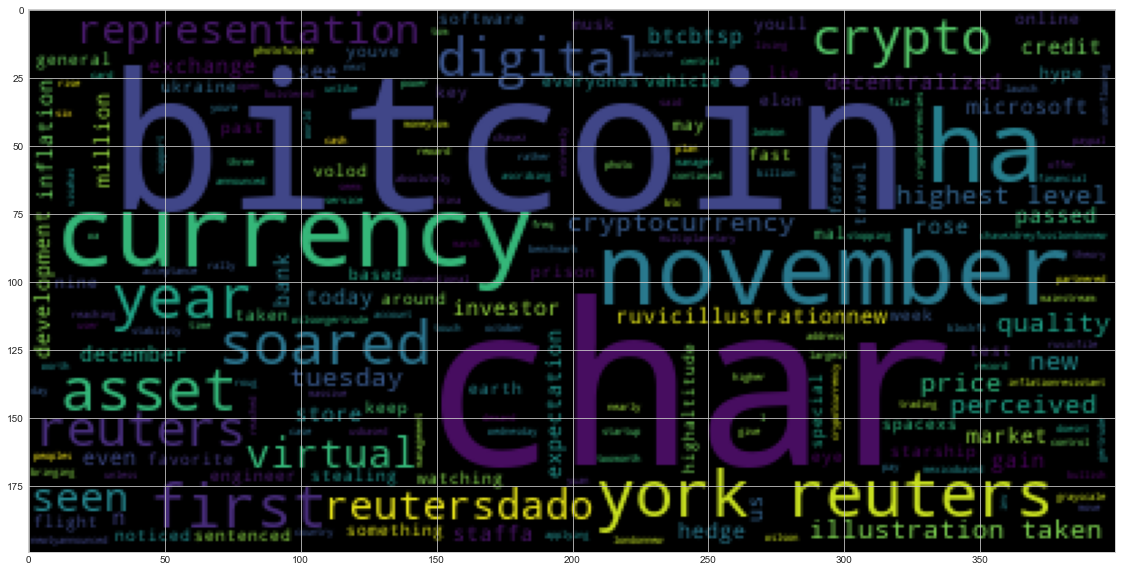

In [62]:
# Generate the Bitcoin word cloud
one_btc_string = ' '.join(all_btc_tokens)
wc = WordCloud().generate(one_btc_string)
plt.imshow(wc)

# YOUR CODE HERE!

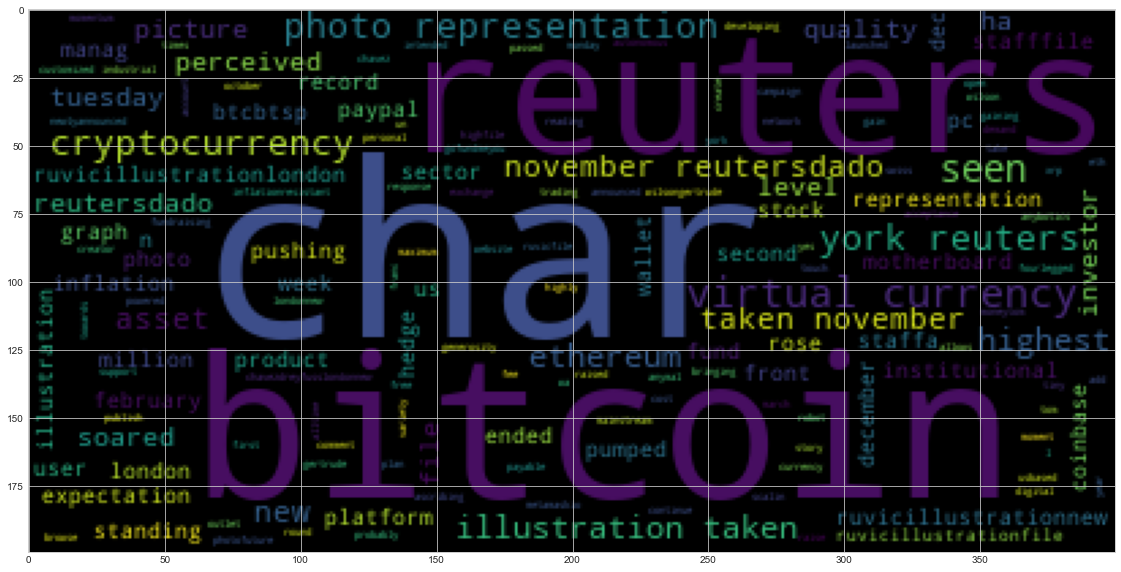

In [63]:
# Generate the Ethereum word cloud
one_eth_string = ' '.join(all_eth_tokens)
wc = WordCloud().generate(one_eth_string)
plt.imshow(wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [64]:
import spacy
from spacy import displacy

In [65]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [66]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [67]:
# Concatenate all of the bitcoin text together
btc_corpus = ' '.join(btc_df["text"])
btc_corpus

"If youve been watching the crypto markets over the past few weeks youll have noticed something special: bitcoin, everyones favorite decentralized digital currency based on hype, lies, and general mal… [+2490 chars] By Reuters Staff\r\nA representation of virtual currency Bitcoin is seen in this illustration taken November 19, 2020. REUTERS/Dado Ruvic/Illustration\r\nNEW YORK (Reuters) - Bitcoin BTC=BTSP rose to a n… [+1407 chars] By Reuters Staff\r\nA representation of virtual currency Bitcoin is seen in this illustration taken November 19, 2020. REUTERS/Dado Ruvic/Illustration\r\nNEW YORK (Reuters) - Bitcoin BTC=BTSP rose to a n… [+1388 chars] A former Microsoft software engineer from Ukraine has been sentenced to nine years in prison for stealing more than $10 million in store credit from Microsoft's online store. From 2016 to 2018, Volod… [+3307 chars] Keep an eye out today — we may see the first high-altitude test flight for SpaceX’s Starship. The vehicle Elon Musk sees as the key

In [68]:
# Run the NER processor on all of the text
btc_ner_doc = nlp(btc_corpus)
# Add a title to the document
# YOUR CODE HERE!

In [69]:
# Render the visualization
displacy.render(btc_ner_doc, style='ent')

In [70]:
# List all Entities
for ent in btc_ner_doc.ents:
    print(ent.text, ent.label_)

the past few weeks DATE
bitcoin GPE
digital ORG
hype GPE
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Reuters ORG
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Reuters ORG
Microsoft ORG
Ukraine GPE
nine years DATE
more than $10 million MONEY
Microsoft ORG
2016 to 2018 DATE
today DATE
first ORDINAL
Elon Musk ORG
Earth LOC
Visa ORG
first ORDINAL
Bitcoin GPE
November 2017 DATE
two-month DATE
Bitcoin GPE
10,000 MONEY
first ORDINAL
the next 20 days DATE
19,665 MONEY
Bitcoin GPE
March 13, 2020 DATE
REUTERS/ ORG
Tom Wilson PERSON
Tom Wilson PERSON
Chavez-Dreyfuss PERSON
LONDON GPE
Reuters ORG
Bitcoin GPE
Tuesday DATE
December 2017 DATE
LONDON GPE
Reuters ORG
Bitcoin GPE
17,000 MONEY
Tuesday DATE
this year DATE
LONDON GPE
Reuters ORG
Bitcoin GPE
Tuesday DATE
December 2017 DATE
PayPal PRODUCT
US GPE
first ORDINAL
US GPE
October DATE
NEW YORK GPE
Reuters ORG
Grayscale ORG
Wednesday DATE
a record $10.4 billion MONEY
nearly three years DATE
Bitcoin GPE
over $15k MONEY


---

## Ethereum NER

In [71]:
# Concatenate all of the ethereum text together
eth_corpus = ' '.join(eth_df["text"])
eth_corpus

"PayPal is bringing its newly-announced support for cryptocurrency to all US accounts. It first announced plans to open cryptocurrency trading to US-based users in October, but until now it was only a… [+589 chars] By Reuters Staff\r\nA representation of virtual currency Bitcoin is seen in this illustration taken November 19, 2020. REUTERS/Dado Ruvic/Illustration\r\nNEW YORK (Reuters) - Bitcoin BTC=BTSP rose to a n… [+1407 chars] By Reuters Staff\r\nA representation of virtual currency Bitcoin is seen in this illustration taken November 19, 2020. REUTERS/Dado Ruvic/Illustration\r\nNEW YORK (Reuters) - Bitcoin BTC=BTSP rose to a n… [+1388 chars] The New York Times is (probably) about to publish a story about cryptocurrency exchange Coinbase. But we're not reading about it on the news outlet's website, because Coinbase has taken the highly un… [+3993 chars] FILE PHOTO: Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, Feb

In [72]:
# Run the NER processor on all of the text
eth_ner_doc = nlp(eth_corpus)
# Add a title to the document
# YOUR CODE HERE!

In [73]:
# Render the visualization
displacy.render(eth_ner_doc, style='ent')

In [74]:
# List all Entities
for ent in eth_ner_doc.ents:
    print(ent.text, ent.label_)

PayPal PRODUCT
US GPE
first ORDINAL
US GPE
October DATE
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Reuters ORG
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Reuters ORG
The New York Times ORG
Coinbase ORG
FILE ORG
February 3, 2018 DATE
REUTERS/ ORG
Reuters ORG
February 3, 2018 DATE
REUTERS/ ORG
Reuters ORG
LONDON GPE
Reuters ORG
XRP ORG
Monday DATE
ETH ORG
0.00011 CARDINAL
about 5¢ CARDINAL
ANYbotics ORG
four CARDINAL
$22.3M Swiss Franc MONEY
scalin PRODUCT
LONDON GPE
Reuters ORG
Bitcoin GPE
17,000 MONEY
Tuesday DATE
this year DATE
LONDON GPE
Reuters ORG
Bitcoin GPE
Tuesday DATE
December 2017 DATE
Bitcoin GPE
March 13, 2020 DATE
REUTERS/ ORG
Tom Wilson PERSON
Tom Wilson PERSON
Chavez-Dreyfuss PERSON
LONDON GPE
Reuters ORG
Bitcoin GPE
Tuesday DATE
December 2017 DATE
NEW YORK GPE
Reuters ORG
$429 million MONEY
the week ended Dec. 7 DATE
second ORDINAL
NEW YORK PERSON
Reuters ORG
$429 million MONEY
the week ended Dec. 7 DATE
second ORDINAL
PayPal PERSON
the 